In [1]:
import os
import json
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import drive
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
mount = "/content/drive"
drive.mount(mount, force_remount=True)
drive_root = mount + "/MyDrive/Econ 148 Development/Forms /"

%cd $drive_root

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1xv4knQahhNdrTQtKG-D_XRytp1qjwqgK/Econ 148 Development/Forms 


## Separating by Experience

In [ ]:
df = pd.read_csv('labs_textbook_feedback.csv')
print(f"Proportion of data we have to drop: {np.mean(df['Which of these classes have you taken before?'].isna())}")
df = df[~df['Which of these classes have you taken before?'].isna()]
df

In [ ]:
npe_df = df[~(df['Which of these classes have you taken before?'].str.contains('Data'))]
npe_df

In [ ]:
pe_df = df[(df['Which of these classes have you taken before?'].str.contains('Data 8')) & ~(df['Which of these classes have you taken before?'].str.contains('Data 100'))]
pe_df

In [ ]:
data100_df = df[(df['Which of these classes have you taken before?'].str.contains('Data 100'))]
data100_df

## Chi-Squared Tests

In [65]:
npe_use = npe_df['How much did you use the textbook while working through this lab?'].value_counts().reset_index().sort_values('index')
npe_use

,index,How much did you use the textbook while working through this lab?
0,1,56
3,2,33
1,3,55
2,4,40
4,5,25


In [66]:
pe_use = pe_df['How much did you use the textbook while working through this lab?'].value_counts().reset_index().sort_values('index')
pe_use

,index,How much did you use the textbook while working through this lab?
3,1,27
4,2,26
0,3,51
1,4,39
2,5,29


In [9]:
data100_use = data100_df['How much did you use the textbook while working through this lab?'].value_counts().reset_index().sort_values('index')
data100_use

,index,How much did you use the textbook while working through this lab?
0,1,151
2,2,34
1,3,55
3,4,20
4,5,7


In [10]:
npe_helpful = npe_df[npe_df['How much did you use the textbook while working through this lab?']>=3]\
 ['If you did use the textbook, did you find it helpful?'].value_counts().reset_index().sort_values('index')
npe_helpful

,index,"If you did use the textbook, did you find it helpful?"
4,1.0,2
3,2.0,11
2,3.0,30
0,4.0,42
1,5.0,31


In [11]:
pe_helpful = pe_df[pe_df['How much did you use the textbook while working through this lab?']>=3]\
 ['If you did use the textbook, did you find it helpful?'].value_counts().reset_index()
pe_helpful.loc[4,:] = [1, 0]
pe_helpful = pe_helpful.sort_values('index')
pe_helpful

,index,"If you did use the textbook, did you find it helpful?"
4,1.0,0.0
3,2.0,3.0
0,3.0,40.0
2,4.0,34.0
1,5.0,35.0


In [12]:
data100_helpful = data100_df[data100_df['How much did you use the textbook while working through this lab?']>=3]\
 ['If you did use the textbook, did you find it helpful?'].value_counts().reset_index().sort_values('index')
data100_helpful

,index,"If you did use the textbook, did you find it helpful?"
4,1.0,1
3,2.0,4
0,3.0,48
1,4.0,19
2,5.0,5


In [13]:
lst = [npe_use, pe_use, data100_use]
for i in range(3):
  for j in range(i+1,3):
    #print(lst[i],lst[j])
    print(stats.chi2_contingency([lst[i].iloc[:,-1].to_list(), lst[j].iloc[:,-1].to_list()]))
    print("______________________")

Chi2ContingencyResult(statistic=7.904305437828189, pvalue=0.09514717799541834, dof=4, expected_freq=array([[45.53018373, 32.3648294 , 58.14698163, 43.33595801, 29.62204724],
       [37.46981627, 26.6351706 , 47.85301837, 35.66404199, 24.37795276]]))
______________________
Chi2ContingencyResult(statistic=54.142255273015294, pvalue=4.913811670610245e-11, dof=4, expected_freq=array([[ 90.88865546,  29.41806723,  48.29831933,  26.34453782,
         14.05042017],
       [116.11134454,  37.58193277,  61.70168067,  33.65546218,
         17.94957983]]))
______________________
Chi2ContingencyResult(statistic=90.85952749601196, pvalue=8.647702965456077e-19, dof=4, expected_freq=array([[ 69.74031891,  23.50797267,  41.53075171,  23.11617312,
         14.1047836 ],
       [108.25968109,  36.49202733,  64.46924829,  35.88382688,
         21.8952164 ]]))
______________________


In [14]:
lst = [npe_helpful, pe_helpful, data100_helpful]
for i in range(3):
  for j in range(i+1,3):
    #print(lst[i],lst[j])
    print(stats.chi2_contingency([lst[i].iloc[:,-1].to_list(), lst[j].iloc[:,-1].to_list()]))
    print("______________________")

Chi2ContingencyResult(statistic=9.017129422301839, pvalue=0.0606727500583657, dof=4, expected_freq=array([[ 1.01754386,  7.12280702, 35.61403509, 38.66666667, 33.57894737],
       [ 0.98245614,  6.87719298, 34.38596491, 37.33333333, 32.42105263]]))
______________________
Chi2ContingencyResult(statistic=28.48610817688687, pvalue=9.94013298355451e-06, dof=4, expected_freq=array([[ 1.80310881,  9.01554404, 46.88082902, 36.66321244, 21.6373057 ],
       [ 1.19689119,  5.98445596, 31.11917098, 24.33678756, 14.3626943 ]]))
______________________
Chi2ContingencyResult(statistic=22.919937494430954, pvalue=0.00013137591787549112, dof=4, expected_freq=array([[ 0.59259259,  4.14814815, 52.14814815, 31.40740741, 23.7037037 ],
       [ 0.40740741,  2.85185185, 35.85185185, 21.59259259, 16.2962963 ]]))
______________________


## Wordclouds

In [50]:
df.columns

Index(['Lab Number', 'Timestamp', 'Email Address',
       'How relevant was this lab to the content taught in lecture?',
       'How difficult did you find this lab?',
       'How much time did you spend on this lab?',
       'Anything you like about this lab?',
       'Anything you dislike about this lab?',
       'Anything else you'd like to tell us?',
       'Which of these classes have you taken before?',
       'How much did you use the textbook while working through this lab?',
       'If you did use the textbook, did you find it helpful?',
       'If you did not use the textbook, why not?',
       'What are your thoughts on the textbook? What does it do well; what could it do better?',
       'Did you spot any blatant mistakes in the textbook?',
       'The codeword for this lab is'],
      dtype='object')

In [59]:
npe_thoughts = " ".join([x.lower().strip() for x in npe_df['What are your thoughts on the textbook? What does it do well; what could it do better?'] if type(x) == str])
pe_thoughts = " ".join([x.lower().strip() for x in pe_df['What are your thoughts on the textbook? What does it do well; what could it do better?'] if type(x) == str])
data100_thoughts = " ".join([x.lower().strip() for x in data100_df['What are your thoughts on the textbook? What does it do well; what could it do better?'] if type(x) == str])
stopwords_thoughts = set(STOPWORDS)
stopwords_thoughts.update(["SQL","na","find","example","lab","code","textbook","section","codes","examples","think","time","next","little","coding"])


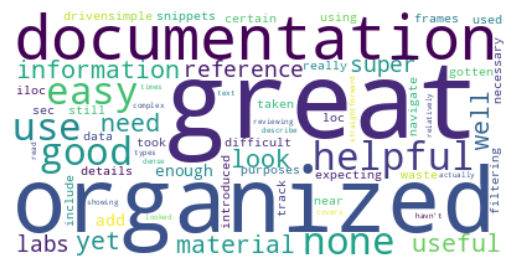

In [60]:
wordcloud = WordCloud(stopwords=stopwords_thoughts, background_color="white").generate(npe_thoughts) #max_font_size=50, max_words=100
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

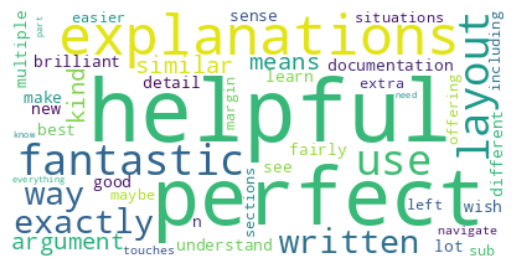

In [61]:
wordcloud = WordCloud(stopwords=stopwords_thoughts, background_color="white").generate(pe_thoughts) #max_font_size=50, max_words=100
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

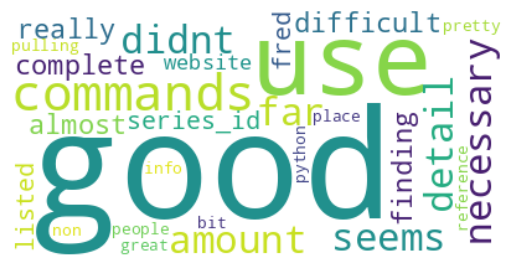

In [62]:
wordcloud = WordCloud(stopwords=stopwords_thoughts, background_color="white").generate(data100_thoughts) #max_font_size=50, max_words=100
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

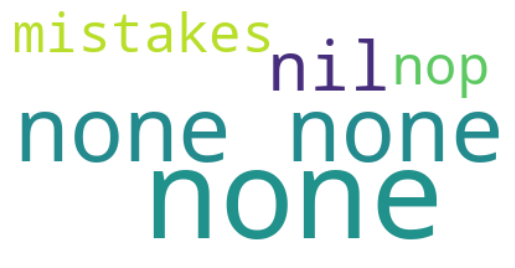

In [64]:
all_mistakes = " ".join([x.lower().strip() for x in npe_df['Did you spot any blatant mistakes in the textbook?'] if type(x) == str])
stopwords_mistakes = set(STOPWORDS)
stopwords_mistakes.update(["na","find","knowledge"])
wordcloud = WordCloud(stopwords=stopwords_mistakes, background_color="white").generate(all_mistakes) #max_font_size=50, max_words=100
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()